In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv(r'C:\Users\shubh\Downloads\Classroom\SY\SEM IV\Machine Learning\Lab\Datasets\Mobile Price Classification\train.csv')
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
data.shape

(2000, 21)

In [4]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [7]:
X = data.drop('price_range', axis=1)
y = data['price_range']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1600, 20), (400, 20), (1600,), (400,))

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [11]:
y_pred = model.predict(X_test_scaled)
y_pred

array([0, 2, 1, 3, 1, 2, 2, 0, 3, 1, 0, 1, 2, 3, 2, 2, 3, 3, 1, 0, 0, 1,
       1, 2, 0, 1, 2, 2, 2, 0, 0, 0, 3, 0, 1, 1, 2, 0, 3, 0, 2, 3, 2, 0,
       3, 2, 1, 1, 3, 1, 3, 1, 0, 0, 1, 1, 1, 2, 0, 0, 1, 3, 3, 1, 0, 0,
       3, 3, 1, 2, 2, 3, 0, 1, 2, 0, 0, 3, 2, 2, 3, 2, 1, 0, 1, 3, 2, 3,
       3, 0, 3, 3, 2, 1, 3, 2, 2, 3, 2, 1, 0, 0, 1, 0, 0, 3, 2, 0, 1, 1,
       0, 0, 3, 1, 2, 2, 3, 2, 0, 2, 1, 3, 2, 1, 3, 3, 0, 3, 0, 2, 3, 0,
       2, 2, 0, 3, 1, 0, 0, 2, 3, 0, 2, 2, 0, 0, 0, 1, 1, 2, 3, 1, 1, 0,
       2, 2, 0, 1, 0, 2, 2, 3, 2, 2, 1, 0, 0, 2, 2, 3, 3, 1, 1, 0, 3, 1,
       1, 2, 1, 0, 0, 0, 0, 0, 3, 2, 0, 3, 0, 0, 0, 0, 1, 3, 3, 1, 0, 1,
       2, 1, 1, 2, 2, 2, 3, 3, 1, 2, 0, 0, 0, 2, 1, 1, 3, 1, 0, 2, 1, 1,
       3, 2, 3, 0, 0, 2, 1, 2, 0, 0, 2, 0, 1, 3, 2, 0, 1, 3, 3, 0, 1, 3,
       2, 3, 0, 3, 1, 2, 3, 3, 2, 1, 1, 3, 3, 1, 3, 3, 3, 3, 3, 0, 1, 2,
       2, 2, 2, 0, 2, 3, 2, 2, 2, 1, 0, 2, 0, 3, 3, 1, 3, 1, 0, 3, 1, 2,
       0, 0, 2, 0, 1, 2, 3, 3, 3, 1, 0, 0, 1, 3, 3,

In [12]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[101,   4,   0,   0],
       [  5,  79,   7,   0],
       [  0,   6,  80,   6],
       [  0,   0,  15,  97]], dtype=int64)

In [13]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8925

In [14]:
precision = precision_score(y_test, y_pred, average='macro')
precision

0.8916329841057944

In [15]:
recall = recall_score(y_test, y_pred, average='macro')
recall

0.8914183189998408

In [16]:
# f1 = f1_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
f1

0.8905478996945861

In [17]:

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

Accuracy: 0.89
Precision: 0.89
Recall: 0.89
F1-score: 0.89


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns


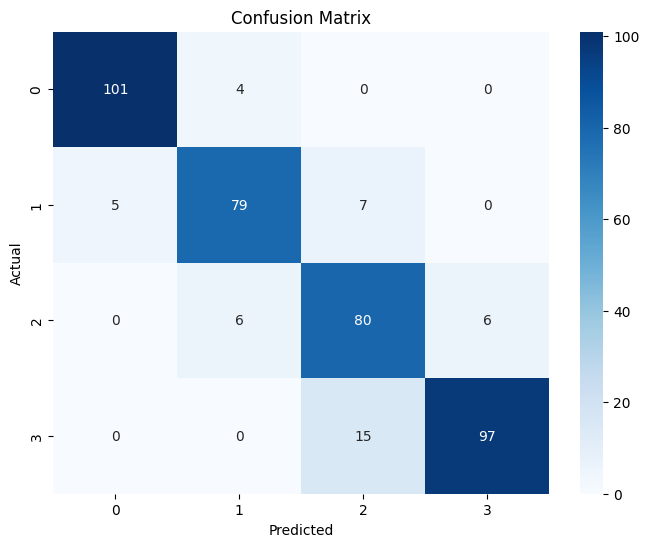

In [20]:
plt.figure(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1,2,3], yticklabels=[0,1,2,3])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


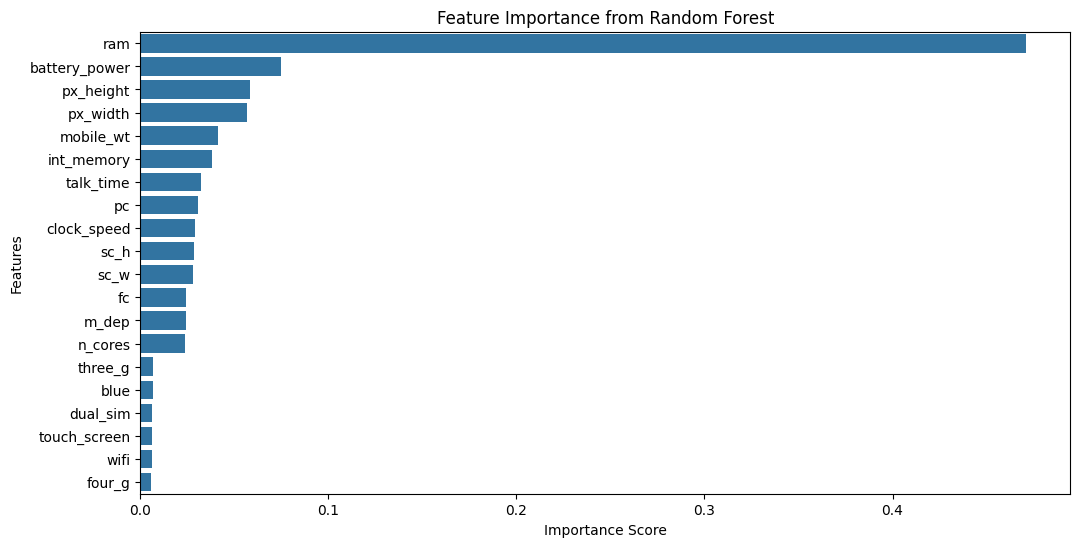

In [21]:
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12,6))
sns.barplot(x=importances[indices], y=features[indices])
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


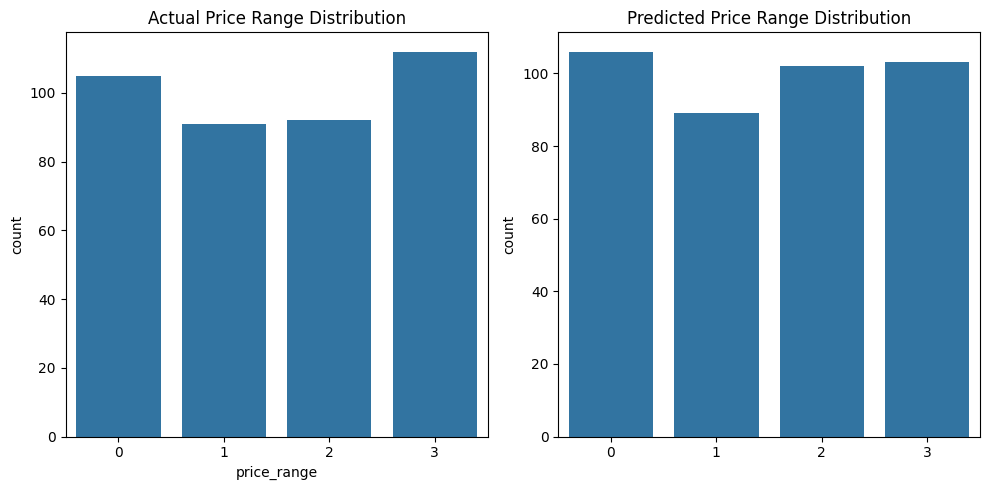

In [22]:
plt.figure(figsize=(10,5))

# Actual
plt.subplot(1, 2, 1)
sns.countplot(x=y_test)
plt.title("Actual Price Range Distribution")

# Predicted
plt.subplot(1, 2, 2)
sns.countplot(x=y_pred)
plt.title("Predicted Price Range Distribution")

plt.tight_layout()
plt.show()


C:\Users\shubh\AppData\Local\Temp\ipykernel_31056\3894351030.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='mako')


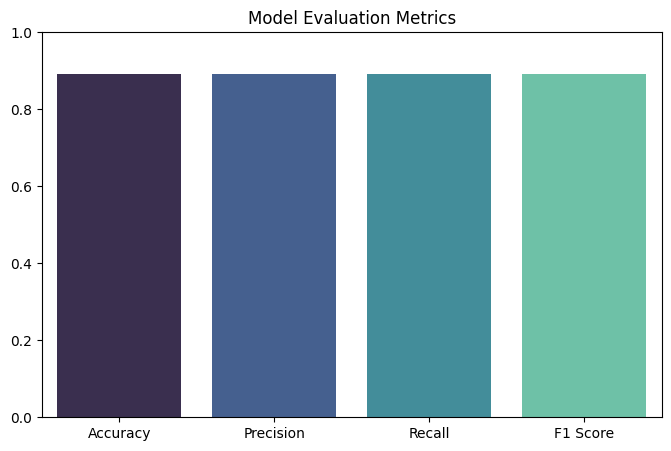

In [23]:
metrics = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}
plt.figure(figsize=(8,5))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='mako')
plt.title("Model Evaluation Metrics")
plt.ylim(0, 1)
plt.show()
